Установка зависимостей.

In [1]:
!sudo apt install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 31 not upgraded.
Need to get 7,816 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [2]:
!pip install gymnasium[atari,accept-rom-license]
!pip install stable-baselines3
!pip install PyVirtualDisplay

Инициализируем среду

In [3]:
env = gym.make("ALE/Pong-v5", difficulty=2, mode=0, render_mode='rgb_array')
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

... и ее пространства

In [4]:
observation_space = env.observation_space
action_space = env.action_space

In [7]:
from stable_baselines3 import DQN
model = DQN("MlpPolicy", env, verbose=1)
timestamp=100000
model.learn(total_timesteps=timestamp, log_interval=100000)
model.save("dqn_pong")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 201.62GB > 11.78GB
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


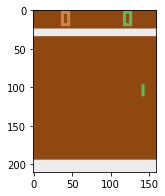

In [8]:
import gymnasium as gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation


d = Display()
d.start()

env = gym.make("ALE/Pong-v5",  render_mode='rgb_array', difficulty=1, mode=0)
obs, info = env.reset()

img = []
for _ in range(200):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(action)

    # display.clear_output(wait=True)
    img.append(env.render())

    if terminated or truncated:
        env.reset()

env.close()
dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))